In [1]:
import sys
sys.path.append('../src')

import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns

from pyportfolio import Portfolio
from dataloader import data_loader
from correlation import findcorr


## Analyzing a Portfolio

What if we have a portfolio already created? How can we see what the expected performance will be?

We can set the weights of each asset we added to our portfolio like in the code below. Here we said we have 75% of our portfolio consists of SPY and the remaining 25 consists of IGIB. It doesn't do too good compared to the optimized portfolio above.

[*********************100%***********************]  3 of 3 completed


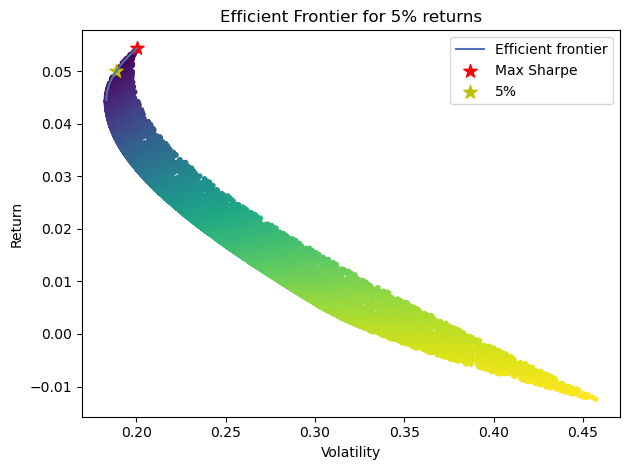

In [8]:
myPortfolio = Portfolio(portfolio_name="Conservative", ticker_string="BAC SHEL WMT", expected_return=0.05, risk_bucket=3)

myPortfolio.show_efficient_frontier()

In [9]:
# myPortfolio.efficient_frontier.set_weights({'SPY': 0.75, 'IGIB': 0.25})
myPortfolio.efficient_frontier.portfolio_performance(verbose=True)

Expected annual return: 5.0%
Annual volatility: 18.9%
Sharpe Ratio: 0.16


(0.05000000000000001, 0.18880111685581782, 0.15889736511945624)

In [13]:
myPortfolio.get_class_alloc()

,Type,Weight
0,BAC,0.00000
1,SHEL,0.11655
2,WMT,0.88345


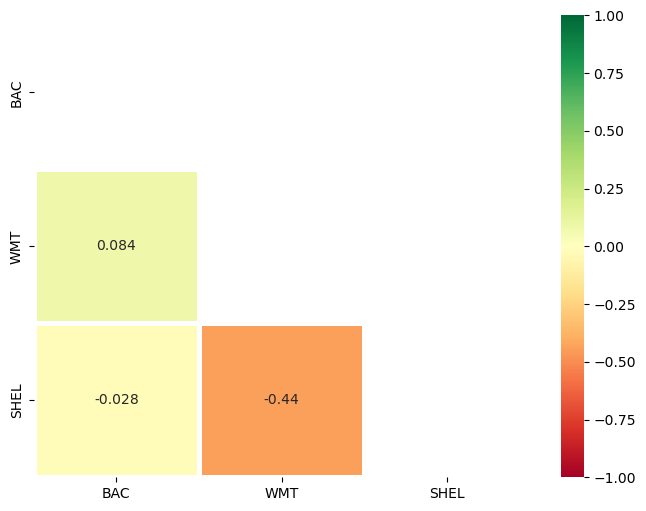

Diversification Report for Portfolio
-------------------------------------
Mean Correlation of each asset:
0.352051
0.214754
0.177192
-------------------------------------
Average Correlation of Portfolio
0.248


In [10]:
myPortfolio.correlation_report()

## Stock Correlation in Portfolio Mgt

Let's use the `data_loader` function to quickly get some pricing data for our stocks. 

In [4]:
price_data = data_loader("SPY WMT JNPR CVS BAC JNJ ABBNY SHEL ORCL")

# yf.download("SPY WMT", group_by="Ticker", period="1y")

[*********************100%***********************]  9 of 9 completed


Next we can call the `findcorr` function to get a quick report.

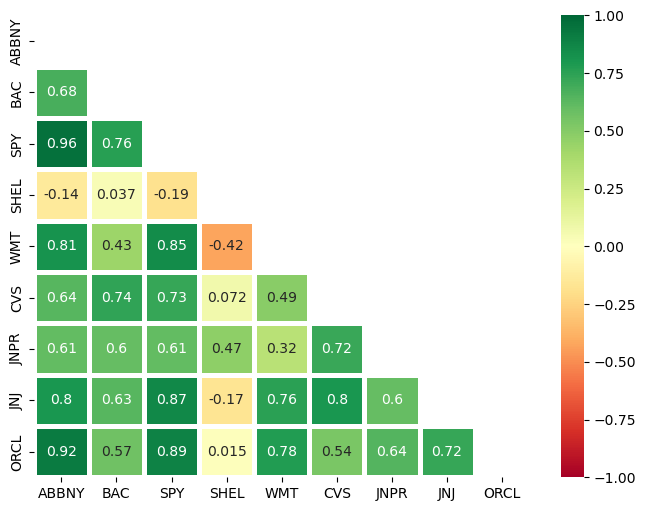

Diversification Report for Portfolio
-------------------------------------
Mean Correlation of each asset:
0.697521
0.605193
0.719168
0.075600
0.556761
0.635732
0.617778
0.668331
0.673925
-------------------------------------
Average Correlation of Portfolio
0.583


In [6]:
findcorr(price_data=price_data)

Wow! Our stocks are very highly correlated. But this makes sense doesn't it because most of our stocks are also tracked in the SPY etf. 

This means that when we see the SPY decrease, changes are our entire portfolio will on average decrease as well. We could definitely use some more diversification.